In [523]:
# import library, pandas to read the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [524]:
# read data stored in path using pd.read_csv, then store the data in df dataframe
df = pd.read_csv('Google Play Store Apps Dataset.csv')

In [525]:
#show first five dataframe content 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [526]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           10841 non-null  object 
 1   Category      10841 non-null  object 
 2   Rating        9367 non-null   float64
 3   Reviews       10841 non-null  object 
 4   Size          10841 non-null  object 
 5   Installs      10841 non-null  object 
 6   Type          10840 non-null  object 
 7   Price         10841 non-null  object 
 8   Content       10840 non-null  object 
 9   Genres        10841 non-null  object 
 10  Last Updated  10841 non-null  object 
 11  Current Ver   10833 non-null  object 
 12  Android Ver   10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [527]:
#the output above shows that all features have object types except the Rating.

#App: Application name.
#Category: Category the app belongs to (FAMILY, GAME, Other)
#Rating: Overall user rating of the app.
#Reviews: Number of user reviews for the app.
#Size: Size of the app.
#Installs: Number of user downloads/installs for the app.
#Type: Paid or Free
#Price: Price of the app.
#Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
#Genres: An app can belong to multiple genres. 

#So there is 4 features need to convert into integer or float  such as Reviews, Size, Installs and Price because it has numbers.

In [528]:
# check to null values
df.isna().sum()

App                0
Category           0
Rating          1474
Reviews            0
Size               0
Installs           0
Type               1
Price              0
Content            1
Genres             0
Last Updated       0
Current Ver        8
Android Ver        3
dtype: int64

In [529]:
# check statistical values
df.describe()

,Rating
count,9367.00
mean,4.19
std,0.54
min,1.00
25%,4.00
50%,4.30
75%,4.50
max,19.00


In [530]:
#Rating feature has tow issue (max=19,null values)
#Change the max value to the mean
df[df['Rating']>5] = (4.19)

In [532]:
#check the result
df.Rating.max()

5.0

In [533]:
#Change null values to the mean
df.Rating.fillna(4.19,inplace=True)

In [534]:
#check null value after cleaning the Rating feature
df.isna().sum()

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        0
Type            1
Price           0
Content         0
Genres          0
Last Updated    0
Current Ver     8
Android Ver     2
dtype: int64

In [535]:
#Rating feature has one issue (data type=object), So I convert the data type of Reviews feature into integer 
df.Reviews=df.Reviews.astype('int')

In [536]:
#check data type of Reviews feature after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           10841 non-null  object 
 1   Category      10841 non-null  object 
 2   Rating        10841 non-null  float64
 3   Reviews       10841 non-null  int32  
 4   Size          10841 non-null  object 
 5   Installs      10841 non-null  object 
 6   Type          10840 non-null  object 
 7   Price         10841 non-null  object 
 8   Content       10841 non-null  object 
 9   Genres        10841 non-null  object 
 10  Last Updated  10841 non-null  object 
 11  Current Ver   10833 non-null  object 
 12  Android Ver   10839 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


In [537]:
df.Size.unique()
#Size feature has tow issue (data type=object,null values) 
#We need to remove the letters from values then we can convert the data type of Size feature into float 

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [538]:
#Remove the letters and word from values
df.Size=df.Size.str.replace('M','')
df.Size=df.Size.str.replace('k','')
df.Size=df.Size.str.replace('Varies with device','')

In [539]:
#Remove '' from values
df.Size=df.Size[df.Size != '']

In [540]:
#check null value
df.isna().sum()

App                0
Category           0
Rating             0
Reviews            0
Size            1696
Installs           0
Type               1
Price              0
Content            0
Genres             0
Last Updated       0
Current Ver        8
Android Ver        2
dtype: int64

In [541]:
# check the most frequitial value 
df.Size.value_counts()

11     199
12     196
14     195
13     191
15     184
      ... 
562      1
173      1
257      1
442      1
430      1
Name: Size, Length: 421, dtype: int64

In [542]:
#convert the null value into the most frequitial value of Size feature
df.Size.fillna('11',inplace=True)

In [543]:
# convert the data type of Size feature into float 
df.Size=df.Size.astype('float')

In [544]:
#check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           10841 non-null  object 
 1   Category      10841 non-null  object 
 2   Rating        10841 non-null  float64
 3   Reviews       10841 non-null  int32  
 4   Size          10841 non-null  float64
 5   Installs      10841 non-null  object 
 6   Type          10840 non-null  object 
 7   Price         10841 non-null  object 
 8   Content       10841 non-null  object 
 9   Genres        10841 non-null  object 
 10  Last Updated  10841 non-null  object 
 11  Current Ver   10833 non-null  object 
 12  Android Ver   10839 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.0+ MB


In [545]:
df.Installs.unique()
#Installs feature has one issue (data type=object) 
#We need to remove the comma and plus from values then we can convert the data type of Installs feature into float 


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 4.19], dtype=object)

In [546]:
#Remove comma and plus from values
df.Installs=df.Installs.str.replace('+','')
df.Installs=df.Installs.str.replace(',','')

<ipython-input-546-aa5e668729d5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Installs=df.Installs.str.replace('+','')


In [547]:
# convert the data type of Installs feature into float 
df.Installs=df.Installs.astype('float')

In [548]:
#check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           10841 non-null  object 
 1   Category      10841 non-null  object 
 2   Rating        10841 non-null  float64
 3   Reviews       10841 non-null  int32  
 4   Size          10841 non-null  float64
 5   Installs      10840 non-null  float64
 6   Type          10840 non-null  object 
 7   Price         10841 non-null  object 
 8   Content       10841 non-null  object 
 9   Genres        10841 non-null  object 
 10  Last Updated  10841 non-null  object 
 11  Current Ver   10833 non-null  object 
 12  Android Ver   10839 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.0+ MB


In [549]:
df.isna().sum()
#After converting, One null value is appear

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        1
Type            1
Price           0
Content         0
Genres          0
Last Updated    0
Current Ver     8
Android Ver     2
dtype: int64

In [550]:
#Remove null value
df.dropna(subset=['Installs'],inplace=True)
df.dropna(subset=['Type'],inplace=True)
df.dropna(subset=['Current Ver'],inplace=True)
df.dropna(subset=['Android Ver'],inplace=True)


In [551]:
#check the result
df.isna().sum()

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        0
Type            0
Price           0
Content         0
Genres          0
Last Updated    0
Current Ver     0
Android Ver     0
dtype: int64

In [552]:
df.Price.unique()
#Price feature has one issue (data type=object) 
#We need to remove the word and $ from values then we can convert the data type of Price feature into float 

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [553]:
#Remove word and $ from values
df.Price=df.Price.str.replace('Everyone','')
df.Price=df.Price.str.replace('$','')

<ipython-input-553-1ac18bd6b87b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Price=df.Price.str.replace('$','')


In [554]:
# convert the data type of Price feature into float 
df.Price=df.Price.astype('float')

In [555]:
df.info()
#it is clean, now I can move to the next step.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           10829 non-null  object 
 1   Category      10829 non-null  object 
 2   Rating        10829 non-null  float64
 3   Reviews       10829 non-null  int32  
 4   Size          10829 non-null  float64
 5   Installs      10829 non-null  float64
 6   Type          10829 non-null  object 
 7   Price         10829 non-null  float64
 8   Content       10829 non-null  object 
 9   Genres        10829 non-null  object 
 10  Last Updated  10829 non-null  object 
 11  Current Ver   10829 non-null  object 
 12  Android Ver   10829 non-null  object 
dtypes: float64(4), int32(1), object(8)
memory usage: 1.1+ MB



## ___




## The project aims to find out the answers of this questions:
- What are the categories of applications that people are most interested in?
- Does the high rating of the application effect on the number of times it is installed?
- Does the type of the app effect on the total number of installing it?
- What are the categories that contain the most non-free applications?




In [556]:
#What are the categories of applications that people are most interested in?
groupd=df.groupby(['Category'])[['Installs']].sum().sort_values('Installs',ascending=False)
groupd

,Installs
Category,
GAME,35086024415.00
COMMUNICATION,32647276251.00
PRODUCTIVITY,14176091369.00
SOCIAL,14069867902.00
TOOLS,11452271905.00
FAMILY,10258203405.00
PHOTOGRAPHY,10088247655.00
NEWS_AND_MAGAZINES,7496317760.00
TRAVEL_AND_LOCAL,6868887146.00


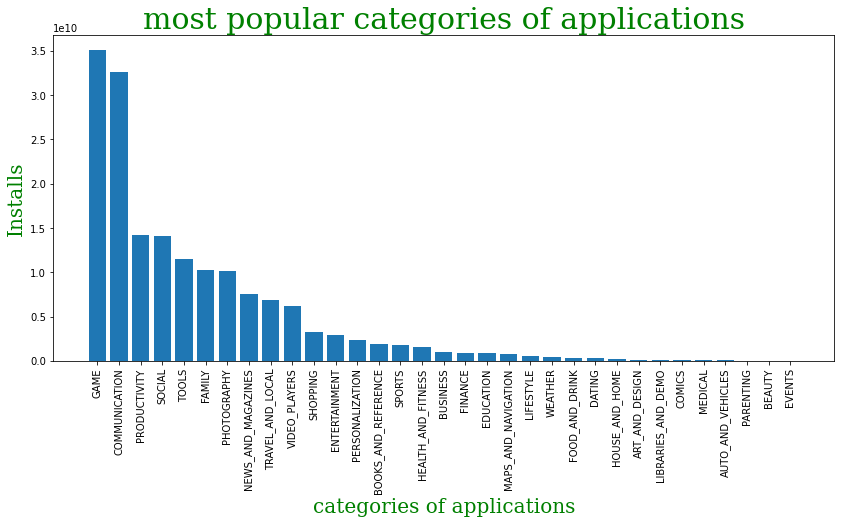

In [557]:
plt.figure(figsize=[14,6])
plt.bar(groupd.index,groupd.Installs);
plt.xticks(rotation=90);
plt.title('most popular categories of applications',fontsize=30,color='g',family='serif');
plt.xlabel('categories of applications',fontsize=20,color='g',family='serif');
plt.ylabel('Installs',fontsize=20,color='g',family='serif');

In [558]:
#Does the high rating of the application effect on the number of times it is installed?
a=df.groupby(['Rating'])[['Installs']].sum().sort_values('Installs',ascending=False)
a

,Installs
Rating,
4.30,37714376810.00
4.50,33741998960.00
4.40,33519750700.00
4.20,17169699160.00
4.60,12471569800.00
4.00,10660491410.00
4.10,8504208600.00
3.90,6117060300.00
4.70,3995375110.00


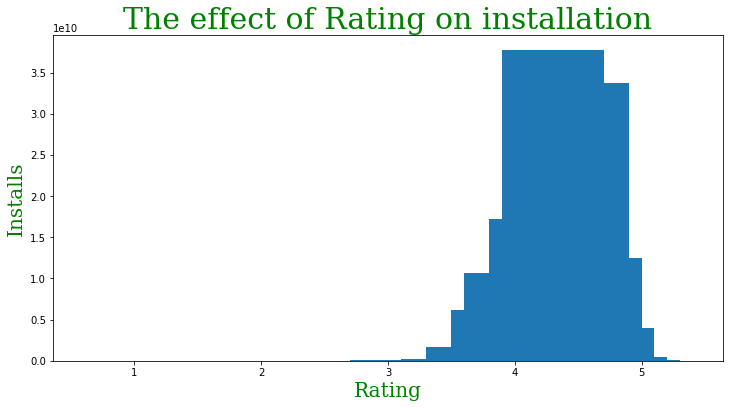

In [559]:
plt.figure(figsize=[12,6]);
plt.bar(a.index,a.Installs);
plt.title('The effect of Rating on installation',fontsize=30,color='g',family='serif');
plt.xlabel('Rating',fontsize=20,color='g',family='serif');
plt.ylabel('Installs',fontsize=20,color='g',family='serif');

In [560]:
#Does the type of installations the app effect on the total number of installing it?
x=df.groupby(['Type'])[['Installs']].median().sort_values('Installs',ascending=False)
x

,Installs
Type,
Free,100000.00
Paid,1000.00


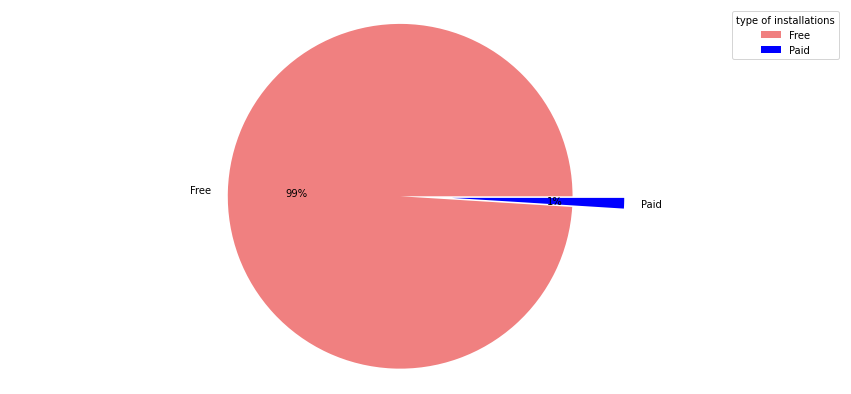

In [561]:
plt.figure(figsize=[15,7]);
plt.pie(x.Installs ,labels=['Free','Paid'] , colors = ['lightcoral','blue'], explode = (0,0.3), autopct='%1.0f%%');
plt.axis('equal');
plt.legend(title = "type of installations");

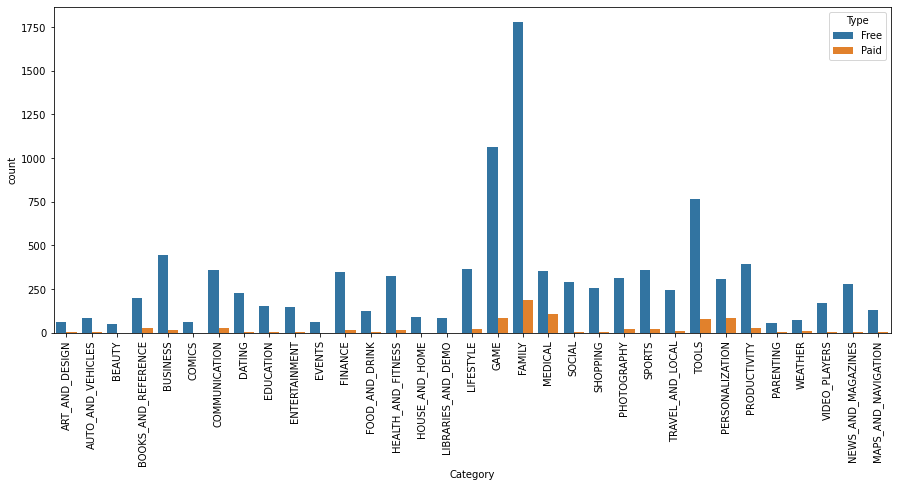

In [562]:
#What are the categories that contain the most non-free applications?
plt.figure(figsize=(15,6));
plot=sns.countplot(x=df.Category,hue=df.Type);
plt.xticks(rotation=90);